### Aggregation methods
- Majority Voting
- Bagging
- Random Forests

##### 1. Majority Voting(다수결)
- hot voting : 단순 투표
- soft voting : 가중치 투표

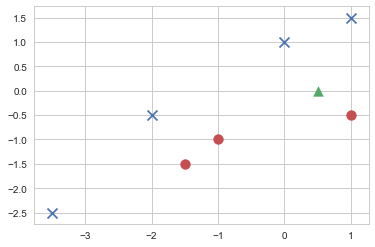

In [16]:
%matplotlib inline
x = np.array([[-1,-1],[-1.5,-1.5],[1,-0.5],[-3.5,-2.5],[0,1],[1,1.5],[-2,-0.5]])
y = np.array([1,1,1,2,2,2,2])

plt.scatter(x[y==1,0], x[y==1,1], s=100, marker='o', c='r')
plt.scatter(x[y==2,0], x[y==2,1], s=100, marker='x', c='b')

x_new = [0.5, 0]

plt.scatter(x_new[0], x_new[1], s=100, marker='^',c='g')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

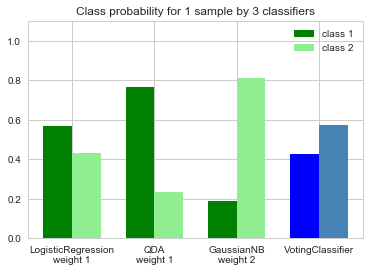

In [18]:
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr',model1),('qda',model2),('gnb',model3)],
                           voting='soft', weights=[1,1,2])

probs = [c.fit(x,y).predict_proba([x_new]) for c in (model1,model2,model3,ensemble)]
class1 = [pr[0,0] for pr in probs]
class2 = [pr[0,1] for pr in probs]

ind = np.arange(4)
width = 0.35 # bar width
p1 = plt.bar(ind, np.hstack([class1[:-1], [0]]), width, color='green', label='class 1')
p2 = plt.bar(ind + width, np.hstack([class2[:-1], [0]]), width, color='lightgreen', label='class 2')
p3 = plt.bar(ind, [0,0,0,class1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0,0,0,class2[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression\nweight 1',
                              'QDA\nweight 1',
                              'GaussianNB\nweight 2',
                              'VotingClassifier'])
plt.ylim([0,1.1])
plt.title("Class probability for 1 sample by 3 classifiers")
plt.legend()
plt.show()

hot voting 방식이었다면 class1 선택이겠지만,

soft voting 방식에 weight를 GaussianNB에 2를 주어 class2 선택

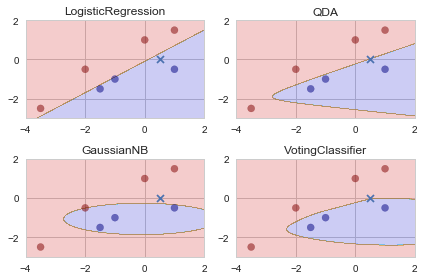

In [19]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['LogisticRegression', 'QDA', 'GaussianNB', 'VotingClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()    
plt.show()